In [1]:
###Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

%matplotlib inline

In [2]:
###Load .env enviroment variables
load_dotenv()

True

In [3]:
###Set current amount of crypto assets
my_btc = 1.2 
my_eth = 5.3

In [4]:
###Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
btc = requests.get(btc_url).json()
eth = requests.get(eth_url).json()

In [6]:
###Fetch current BTC price
btc_value = btc["data"]["1"]["quotes"]["CAD"]["price"]
###Fetch current ETH price
eth_value = eth["data"]["1027"]["quotes"]["CAD"]["price"]

In [7]:
###Compute current value of my crpto
my_btc_value = btc_value * my_btc
my_eth_value = eth_value * my_eth

In [8]:
###Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $73345.58
The current value of your 5.3 ETH is $12079.98


In [9]:
###Current amount of shares
my_agg = 200
my_spy = 50

In [10]:
###Set Alpaca API key and secret
alpaca_api_key = os.getenv("api_key_id")
alpaca_secret_key = os.getenv("secret_api_key")
###Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [11]:
###Format current date as ISO format
today = pd.Timestamp("2020-10-16", tz="America/New_York").isoformat()
###Set the tickers
tickers = ["AGG", "SPY"]
###Set timeframe to '1D' for Alpaca API
timeframe = "1D"
###Get current closing prices for SPY and AGG
stocks_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

###Preview DataFrame
stocks_portfolio

AGG                                        SPY  \
                             open      high     low   close   volume    open   
2020-10-16 00:00:00-04:00  117.99  118.0778  117.88  117.88  3589312  348.96   

                                                            
                             high    low   close    volume  
2020-10-16 00:00:00-04:00  350.75  347.1  347.25  62467863

In [12]:
###Pick AGG and SPY close prices
agg_close_price = float(stocks_portfolio["AGG"]["close"])
spy_close_price = float(stocks_portfolio["SPY"]["close"])

###Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.88
Current SPY closing price: $347.25


In [13]:
###Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

###Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17362.50
The current value of your 200 AGG shares is $23576.00


In [14]:
###Set monthly household income
monthly_income = 12000
###Create savings DataFrame
stocks_data = {
    "amount": [(my_btc_value + my_eth_value), (my_agg_value + my_spy_value)]
}
###Set the tickers
tickers_data = ["crypto", "shares"]
df_savings = pd.DataFrame(stocks_data, index=tickers_data)
###Display savings DataFrame
df_savings

,amount
crypto,85425.566228
shares,40938.500000


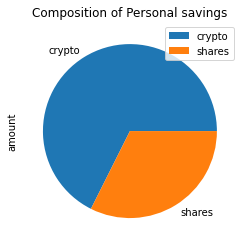

In [15]:
###Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal savings").get_figure().savefig("savings.png")

In [16]:
###Set ideal emergency fund
emergency_fund = monthly_income * 3
total_savings = my_btc_value + my_eth_value + my_agg_value + my_spy_value
###Calculate total amount of savings
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund")
elif total_savings == emergency_fund:
    print("Congratulations! You reached your financial goal")
elif total_savings < emergency_fund:
    print(f"You are {balance} from reaching your goal")
###Validate saving health
balance = (my_btc_value + my_eth_value + my_agg_value + my_spy_value) - (monthly_income * 3) 

Congratulations! You have enough money in your emergency fund


In [17]:
from MCForecastTools import MCSimulation

In [18]:
###Set start and end dates of five years back from today.
###Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-09', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-09', tz='America/New_York').isoformat()

In [19]:
###Get 5 years' worth of historical data for SPY and AGG
df_portfolio_5y = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

###Display sample data
df_portfolio_5y.head()

AGG                                         SPY  \
                             open     high     low    close    volume    open   
2020-05-20 00:00:00-04:00  117.03  117.340  117.00  117.300   7298248  295.82   
2020-05-21 00:00:00-04:00  117.35  117.475  117.32  117.360   9298498  296.79   
2020-05-22 00:00:00-04:00  117.60  117.600  117.39  117.445   5391598  294.57   
2020-05-26 00:00:00-04:00  117.38  117.440  117.24  117.260  10370264  301.93   
2020-05-27 00:00:00-04:00  117.50  117.540  117.30  117.400   7335948  302.12   

                                                                
                             high       low   close     volume  
2020-05-20 00:00:00-04:00  297.87  295.5700  296.96  131889644  
2020-05-21 00:00:00-04:00  297.67  293.6886  294.79  137785798  
2020-05-22 00:00:00-04:00  295.63  293.2200  295.42  105447017  
2020-05-26 00:00:00-04:00  302.19  295.4646  299.15  158781230  
2020-05-27 00:00:00-04:00  303.57  296.8700  303.48  181751196

In [20]:
###Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stocks_30 = MCSimulation(
    portfolio_data = df_portfolio_5y,
    weights = [.40,.60,],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [21]:
###Printing the simulation input data
MC_stocks_30.portfolio_data.head()

AGG                                      \
                             open     high     low    close    volume   
2020-05-20 00:00:00-04:00  117.03  117.340  117.00  117.300   7298248   
2020-05-21 00:00:00-04:00  117.35  117.475  117.32  117.360   9298498   
2020-05-22 00:00:00-04:00  117.60  117.600  117.39  117.445   5391598   
2020-05-26 00:00:00-04:00  117.38  117.440  117.24  117.260  10370264   
2020-05-27 00:00:00-04:00  117.50  117.540  117.30  117.400   7335948   

                                           SPY                            \
                          daily_return    open    high       low   close   
2020-05-20 00:00:00-04:00          NaN  295.82  297.87  295.5700  296.96   
2020-05-21 00:00:00-04:00     0.000512  296.79  297.67  293.6886  294.79   
2020-05-22 00:00:00-04:00     0.000724  294.57  295.63  293.2200  295.42   
2020-05-26 00:00:00-04:00    -0.001575  301.93  302.19  295.4646  299.15   
2020-05-27 00:00:00-04:00     0.001194  302.12  303.57  296.8700  303.48   

                                                   
                              volume daily_return  
2020-05-20 00:00:00-04:00  131889644          NaN  
2020-05-21 00:00:00-04:00  137785798    -0.007307  
2020-05-22 00:00:00-04:00  105447017     0.002137  
2020-05-26 00:00:00-04:00  158781230     0.012626  
2020-05-27 00:00:00-04:00  181751196     0.014474

In [22]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stocks_30.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010137,0.988379,0.995280,0.991526,0.997230,1.008021,1.001275,1.000326,0.994640,1.010018,...,0.993555,1.009749,0.998662,0.996763,1.010886,0.997994,0.979620,1.002538,0.984780,1.002843
2,1.008041,0.984428,1.001171,0.991263,0.997541,1.017597,0.998941,1.001649,0.993940,1.017618,...,0.985802,0.997463,1.005297,1.008495,1.014356,1.005039,0.976633,1.005332,0.982803,1.008891
3,1.009051,0.971141,1.004410,0.998660,0.995713,1.003355,1.005758,0.998293,1.002191,1.018907,...,0.992385,0.979868,0.989545,1.011596,1.012527,1.000684,0.978042,1.012769,0.977291,1.007237
4,1.009622,0.975123,1.002085,0.990468,1.008755,1.005805,0.996418,1.010520,1.025848,1.019098,...,0.982754,0.967160,0.992724,1.006804,1.019453,0.991468,0.977071,1.003645,0.982698,1.017505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4208.625051,867.465076,1516.831512,1681.899645,2076.728070,1699.081737,823.150497,546.156593,5205.488297,2060.611286,...,2014.239703,1534.067082,1740.118835,4401.025602,3777.947806,2810.382112,992.215338,3380.566745,1890.387810,2691.070706
7557,4238.036740,875.003316,1506.882982,1676.217152,2078.443578,1714.672493,826.050470,547.816596,5232.831111,2088.733158,...,2020.648810,1551.142797,1762.394157,4395.899596,3763.898996,2814.838548,1000.093821,3371.155062,1888.375620,2672.995812
7558,4205.071206,885.627320,1503.387390,1670.184091,2086.787507,1711.636341,825.952256,545.136687,5274.914933,2077.806971,...,2025.717385,1524.296195,1729.607037,4336.343243,3753.699932,2809.219010,1001.115601,3424.524614,1917.245149,2658.539189
7559,4211.755106,887.165018,1503.356909,1652.047165,2090.429793,1724.527612,835.347483,537.495178,5285.731738,2083.721159,...,2034.940548,1522.082545,1731.771774,4396.904895,3753.076028,2810.373378,989.279773,3440.607462,1949.531032,2662.238794


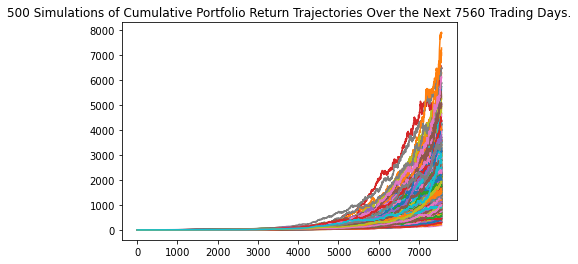

In [23]:
 # Plot simulation outcomes
line_plot = MC_stocks_30.plot_simulation()

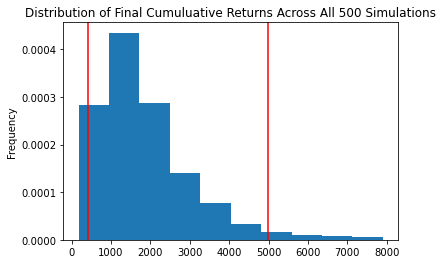

In [24]:
# Plot probability distribution and confidence intervals
dist_plot = MC_stocks_30.plot_distribution()

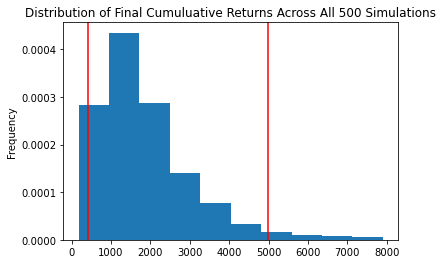

In [25]:
MC_stocks_30.plot_distribution().get_figure().savefig("MC_stocks_30.png")

In [26]:
# Fetch summary statistics from the Monte Carlo simulation results
stocks_tbl = MC_stocks_30.summarize_cumulative_return() 

# Print summary statistics
print(stocks_tbl)

count            500.000000
mean            1853.140920
std             1201.354603
min              177.627325
25%             1000.858083
50%             1569.571008
75%             2312.755511
max             7900.515743
95% CI Lower     429.820286
95% CI Upper    4972.749915
Name: 7560, dtype: float64


In [27]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible 
#outcomes of our $20,000
ci_lower = round(stocks_tbl[8]*initial_investment,2)
ci_upper = round(stocks_tbl[9]*initial_investment,2)

# Print results
print(f"With an initial investment of ${initial_investment} in your portfolio you have a 95% " 
      f"chance it will be within in the range of ${ci_lower} and ${ci_upper} over the next 30 years")

With an initial investment of $20000 in your portfolio you have a 95% chance it will be within in the range of $8596405.72 and $99454998.3 over the next 30 years


In [28]:
# Set initial investment
initial_investment_inc = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible 
#outcomes of our $30,000
ci_lower_inc = round(stocks_tbl[8]*initial_investment_inc,2)
ci_upper_inc = round(stocks_tbl[9]*initial_investment_inc,2)

# Print results
# Print results
print(f"With an initial investment of ${initial_investment_inc} in your portfolio you have a 95 %" 
      f"chance it will be within in the range of ${ci_lower_inc} and ${ci_upper_inc} over the next 30 years")

With an initial investment of $30000.0 in your portfolio you have a 95 %chance it will be within in the range of $12894608.58 and $149182497.45 over the next 30 years


In [29]:
#Optional Challenge - Early Retirement - 5y

In [30]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_stocks_5 = MCSimulation(
    portfolio_data = df_portfolio_5y,
    weights = [.20,.80,],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [31]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_stocks_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003772,1.006504,0.998886,1.017298,1.002674,0.991955,0.993651,0.994800,1.003275,0.995227,...,1.005466,0.972299,1.015927,1.017351,1.002995,1.001899,1.010901,0.985108,1.002543,1.007026
2,1.003314,1.016323,1.006934,1.025977,1.007727,0.986733,0.986894,0.984605,1.008064,0.995023,...,0.994680,0.965335,1.026187,1.029072,1.021226,0.993408,1.017643,1.002932,0.995511,1.013103
3,1.004875,1.004865,1.014145,1.035204,1.011923,0.994130,0.998731,0.982579,1.012589,0.990894,...,0.989994,0.958676,1.034679,1.023577,1.018130,0.981269,1.025467,0.998664,0.995051,1.023630
4,1.006117,1.029119,1.004425,1.055381,1.005918,0.986190,0.996823,1.005407,1.010415,0.992960,...,1.001698,0.968394,1.046618,1.018861,1.018510,0.979609,1.026739,1.007212,1.005458,1.021197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,5.109381,5.229762,3.244380,3.787162,7.626745,2.500460,6.437949,4.551246,5.764936,4.378770,...,4.724483,6.389290,6.829409,6.322530,4.414040,6.100636,5.132460,3.981346,3.794240,4.935241
1257,5.091138,5.232412,3.193549,3.863126,7.629416,2.471751,6.485247,4.583639,5.726649,4.355013,...,4.738664,6.256344,6.746506,6.357393,4.408249,6.117114,5.216050,3.978393,3.667000,4.972322
1258,5.002752,5.256205,3.254923,3.860165,7.555546,2.500984,6.458369,4.593896,5.732580,4.374102,...,4.761076,6.129973,6.758066,6.293537,4.352680,6.095246,5.189235,4.019683,3.709465,4.863076
1259,4.969317,5.341183,3.325827,3.889142,7.582253,2.522382,6.469002,4.610531,5.780259,4.416508,...,4.836905,6.107868,6.841226,6.360702,4.355158,6.102040,5.253300,4.015395,3.743735,4.902912


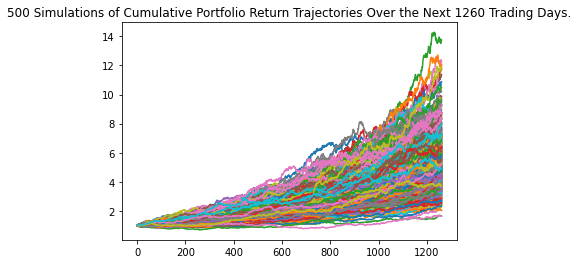

In [32]:
# Plot simulation outcomes 
line_plot_5y = MC_stocks_5.plot_simulation()

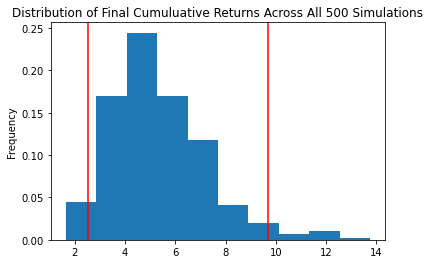

In [33]:
# Plot probability distribution and confidence intervals 
dist_plot_5y = MC_stocks_5.plot_distribution()

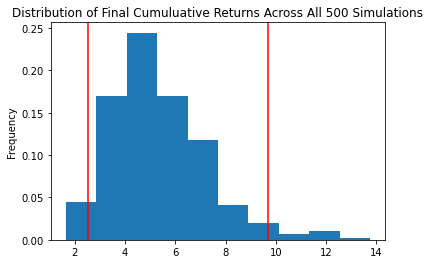

In [47]:
MC_stocks_5.plot_distribution().get_figure().savefig("MC_stocks_5.png")

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results 
tbl_5y = MC_stocks_5.summarize_cumulative_return() 
# Print summary statistics 
print(tbl_5y)

count           500.000000
mean              5.361075
std               1.885067
min               1.641661
25%               4.034608
50%               4.985383
75%               6.408107
max              13.753924
95% CI Lower      2.542031
95% CI Upper      9.689058
Name: 1260, dtype: float64


In [36]:
# Set initial investment
initial_investment_ER1 = 300000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes
ci_lower_ER1 = round(tbl_5y[8]*initial_investment_ER1,2)
ci_upper_ER1 = round(tbl_5y[9]*initial_investment_ER1,2)

# Print results
# Print results
print(f"With an initial investment of ${initial_investment_ER1} in your portfolio you have a 95% " 
      f"chance it will be within in the range of ${ci_lower_ER1} and ${ci_upper_ER1} over the next 5 years")

With an initial investment of $300000 in your portfolio you have a 95% chance it will be within in the range of $762609.28 and $2906717.36 over the next 5 years


In [37]:
#Optional Challenge - Early Retirement - 10y

In [38]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_stocks_10 = MCSimulation(
    portfolio_data = df_portfolio_5y,
    weights = [.30,.70,],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [39]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_stocks_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.986104,1.016467,0.994931,1.014846,1.004989,0.992208,1.015005,1.004193,0.994266,0.997756,...,0.994172,1.005176,0.991537,1.017687,1.013473,0.995618,1.007886,0.995962,1.002480,1.005573
2,0.974681,1.024680,0.997413,1.020100,0.993759,0.983779,1.004884,0.991952,0.983561,1.006998,...,0.979805,1.024838,0.999148,1.030147,1.019355,1.000184,1.015102,1.018985,1.005549,1.017484
3,0.977489,1.022908,1.004094,1.019407,0.989789,0.981993,1.000002,0.995942,0.973005,1.008793,...,0.978615,1.031997,0.997348,1.043528,1.011996,1.010842,1.034714,0.999302,0.998404,1.001455
4,0.989178,1.018931,0.998772,1.023493,0.995382,0.979981,1.000256,1.005051,0.972797,1.011003,...,0.998761,1.028839,0.990029,1.049626,1.003891,0.995081,1.038091,1.010879,0.991280,1.001472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,34.770965,7.327745,19.238906,15.959151,15.393421,16.644670,23.341174,12.988812,9.578295,12.332913,...,28.253503,19.137525,16.980429,16.069727,17.151174,7.555179,18.999166,24.345039,44.290336,18.457163
2517,34.889068,7.162869,19.242994,15.844873,15.234739,16.476237,23.235160,13.130701,9.555367,12.510400,...,28.134149,19.366470,16.817975,15.939817,17.253075,7.569327,19.118040,24.308563,44.342142,18.624129
2518,35.212241,7.261260,19.001056,15.956502,15.225427,16.375970,23.222934,13.126316,9.615147,12.569716,...,28.420140,19.540305,16.907156,16.069041,17.492866,7.631748,19.267730,24.254708,44.568870,18.490139
2519,35.321017,7.342878,19.048738,16.211822,15.201731,16.169295,23.590230,13.182738,9.847186,12.878285,...,27.940001,19.706748,17.094060,16.240752,17.453222,7.531948,19.265576,24.239569,44.091907,18.803788


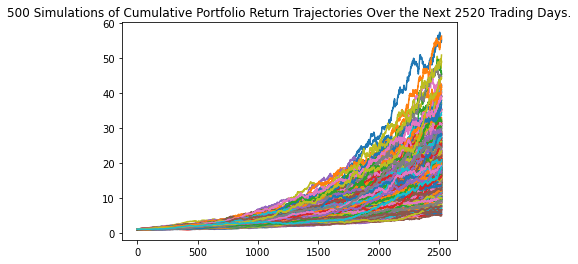

In [40]:
# Plot simulation outcomes 
line_plot_10y = MC_stocks_10.plot_simulation()

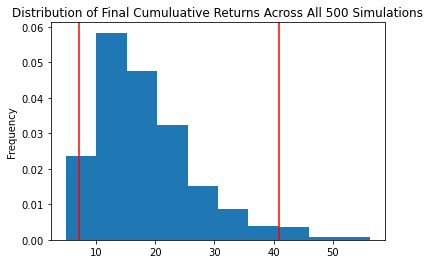

In [41]:
# Plot probability distribution and confidence intervals 
dist_plot_10y = MC_stocks_10.plot_distribution()

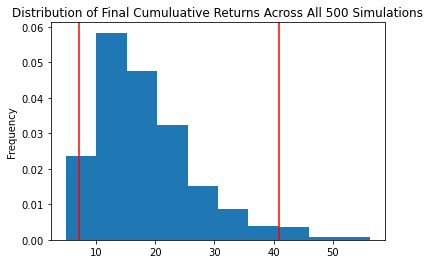

In [48]:
MC_stocks_10.plot_distribution().get_figure().savefig("MC_stocks_10.png")

In [43]:
# Fetch summary statistics from the Monte Carlo simulation results 
tbl_10y = MC_stocks_10.summarize_cumulative_return() 
# Print summary statistics 
print(tbl_10y)

count           500.000000
mean             18.479814
std               8.462613
min               4.863750
25%              12.646348
50%              16.779190
75%              22.421191
max              56.313784
95% CI Lower      7.015818
95% CI Upper     40.852238
Name: 2520, dtype: float64


In [44]:
# Set initial investment
initial_investment_ER2 = 200000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes
ci_lower_ER2 = round(tbl_10y[8]*initial_investment_ER2,2)
ci_upper_ER2 = round(tbl_10y[9]*initial_investment_ER2,2)

# Print results
print(f"With an initial investment of ${initial_investment_ER2} in your portfolio you have a 95% " 
      f"chance it will be within in the range of ${ci_lower_ER2} and ${ci_upper_ER2} over the next 10 years")

With an initial investment of $200000 in your portfolio you have a 95% chance it will be within in the range of $1403163.55 and $8170447.51 over the next 10 years


In [45]:
print("Financial Analysis")
print("----------------------------")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print("----------------------------")
print(f"With an initial investment of ${initial_investment} in your portfolio you have a 95% " 
      f"chance it will be within the range of ${ci_lower} and ${ci_upper} over the next 30 years")
print("----------------------------")
print(f"With an initial investment of ${initial_investment_inc} in your portfolio you have a 95% " 
      f"chance it will be within the range of ${ci_lower_inc} and ${ci_upper_inc} over the next 30 years")
print("----------------------------")
print("----------------------------EARLY RETIREMENT SIMULATION----------------------------")
print(f"With an initial investment of ${initial_investment_ER1} in your portfolio you have a 95% " 
      f"chance it will be within the range of ${ci_lower_ER1} and ${ci_upper_ER1} over the next 5 years")
print("----------------------------")
print(f"With an initial investment of ${initial_investment_ER2} in your portfolio you have a 95% " 
      f"chance it will be within the range of ${ci_lower_ER2} and ${ci_upper_ER2} over the next 10 years")

Financial Analysis
----------------------------
The current value of your 50 SPY shares is $17362.50
The current value of your 200 AGG shares is $23576.00
----------------------------
With an initial investment of $20000 in your portfolio you have a 95% chance it will be within the range of $8596405.72 and $99454998.3 over the next 30 years
----------------------------
With an initial investment of $30000.0 in your portfolio you have a 95% chance it will be within the range of $12894608.58 and $149182497.45 over the next 30 years
----------------------------
----------------------------EARLY RETIREMENT SIMULATION----------------------------
With an initial investment of $300000 in your portfolio you have a 95% chance it will be within the range of $762609.28 and $2906717.36 over the next 5 years
----------------------------
With an initial investment of $200000 in your portfolio you have a 95% chance it will be within the range of $1403163.55 and $8170447.51 over the next 10 years


In [46]:
print("Early Retirement Analysis")
print("----------------------------")
print(f"To be able to retire in 5 years you would need to have an initial investment of ${initial_investment_ER1} "
      f"considering 80% stocks (SPY) and 20% bonds (AGG) composition of the portfolio." 
      f"It would give 95% chance it will be within the range of ${ci_lower_ER1} and ${ci_upper_ER1} over the next 5 years")
print("THIS WOULD BE A RISK TAKER PORTFOLIO")
print("----------------------------")
print(f"To be able to retire in 5 years you would need to have an initial investment of ${initial_investment_ER2} "
      f"considering 70% stocks (SPY) and 30% bonds (AGG) composition of the portfolio." 
      f"It would give 95% chance it will be within the range of ${ci_lower_ER2} and ${ci_upper_ER2} over the next 10 years")
print("THIS WOULD BE A CONSERVATIVE PORTFOLIO TO RETIRE EARLY")

Early Retirement Analysis
----------------------------
To be able to retire in 5 years you would need to have an initial investment of $300000 considering 80% stocks (SPY) and 20% bonds (AGG) composition of the portfolio.It would give 95% chance it will be within the range of $762609.28 and $2906717.36 over the next 5 years
THIS WOULD BE A RISK TAKER PORTFOLIO
----------------------------
To be able to retire in 5 years you would need to have an initial investment of $200000 considering 70% stocks (SPY) and 30% bonds (AGG) composition of the portfolio.It would give 95% chance it will be within the range of $1403163.55 and $8170447.51 over the next 10 years
THIS WOULD BE A CONSERVATIVE PORTFOLIO TO RETIRE EARLY
